In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
# Set the environment variable to use only the GPU with ID 1 (GTX 1080 Ti)
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential 
import pandas as pd
import numpy as np
import pathlib

2024-06-25 11:48:41.421259: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-25 11:48:48.378284: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import numpy as np
from skimage.feature import hog
from skimage.color import rgb2gray
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from skimage import data, exposure

# Test a sample for the image processing

In [3]:
def show_image(image):
    if image.shape == (480, 640, 3):
        # Convert the image from BGR to RGB
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # Display the image using matplotlib
        plt.imshow(image)
    elif image.shape ==(480, 640):
        plt.imshow(image, cmap='gray')
        
        

    plt.axis('off')  # Hide the axis
    plt.show()

In [4]:
test_data_dir='/home/rag-tt/test_data/'
test_image_path = os.path.join(test_data_dir,'1','1.jpg')
test_image = cv2.imread(test_image_path)
print(test_image.shape)

(480, 640, 3)


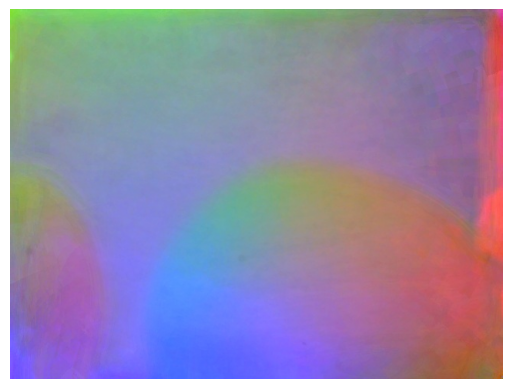

In [5]:
show_image(test_image)

In [6]:
test_image_gray = rgb2gray(test_image)
print(test_image_gray.shape)

(480, 640)


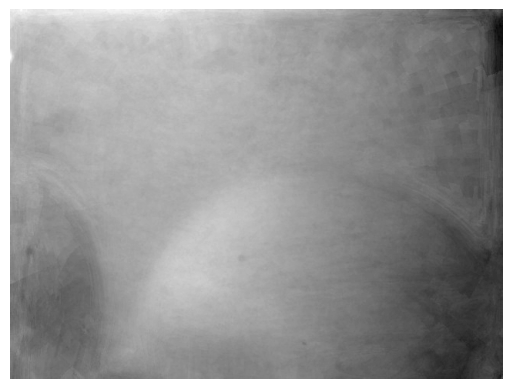

In [7]:
show_image(test_image_gray)

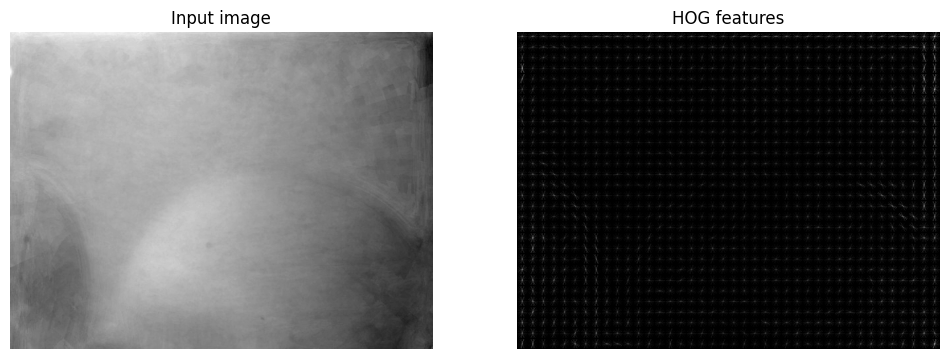

In [8]:
# Compute HOG features
hog_features, hog_image = hog(test_image_gray, pixels_per_cell=(16, 16),
                              cells_per_block=(2, 2), visualize=True, feature_vector=True)

# Plot original image and HOG image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(test_image_gray, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('HOG features')
plt.show()


In [9]:
test_depth_image_path = os.path.join(test_data_dir,'1','depth1.png')
test_depth_image = cv2.imread(test_depth_image_path)
print(test_depth_image.shape)

(480, 640, 3)


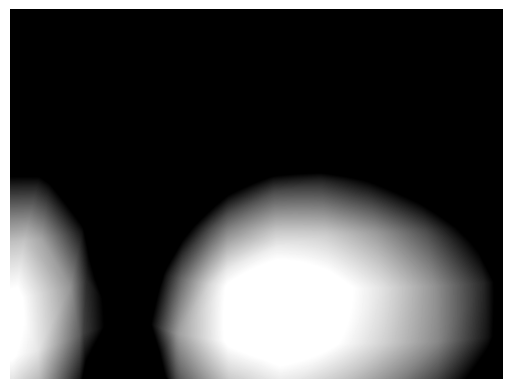

In [10]:
test_depth_image_gray = rgb2gray(test_depth_image)
show_image(test_depth_image_gray)

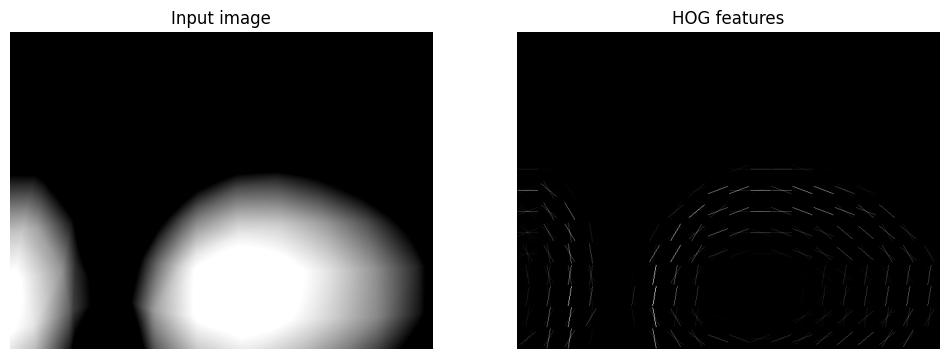

In [11]:
# Compute HOG features
hog_features, hog_image = hog(test_depth_image_gray, pixels_per_cell=(32, 32),
                              cells_per_block=(2, 2), visualize=True, feature_vector=True)

# Plot original image and HOG image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(test_depth_image_gray, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('HOG features')
plt.show()

In [12]:
# Function to compute HOG features and visualize
def visualize_hog(images, pixels_per_cell=(32, 32), cells_per_block=(2, 2)):
    num_images = len(images)

    # Create a figure with subplots
    fig, axes = plt.subplots(num_images, 2, figsize=(12, 6*num_images), sharex=True, sharey=True)

    for i, img in enumerate(images):
        # Convert image to grayscale if it's not already
        if len(img.shape) > 2:
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        else:
            img_gray = img

        # Compute HOG features
        hog_features, hog_image = hog(img_gray, pixels_per_cell=pixels_per_cell,
                                      cells_per_block=cells_per_block, visualize=True, feature_vector=True)

        # Rescale histogram for better display
        hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

        # Plot original image
        axes[i, 0].imshow(img_gray, cmap='gray')
        axes[i, 0].set_title('Input Image {}'.format(i+1))
        axes[i, 0].axis('off')

        # Plot HOG image
        axes[i, 1].imshow(hog_image_rescaled, cmap='gray')
        axes[i, 1].set_title('HOG Features {}'.format(i+1))
        axes[i, 1].axis('off')

    plt.tight_layout()
    plt.show()

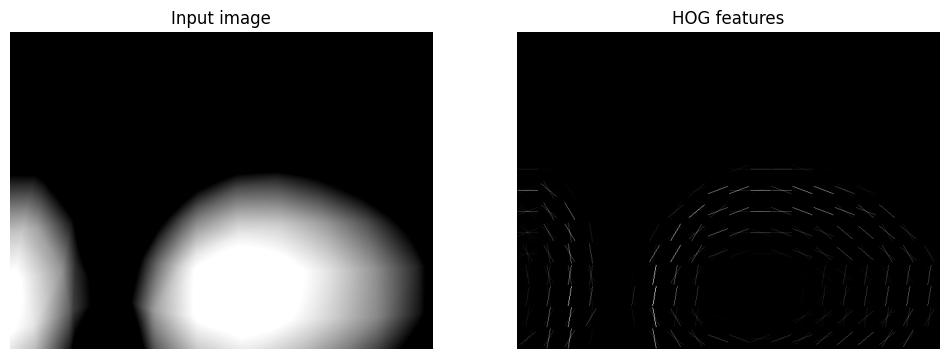

In [13]:
# Compute HOG features
hog_features, hog_image = hog(test_depth_image_gray, pixels_per_cell=(32, 32),
                              cells_per_block=(2, 2), visualize=True, feature_vector=True)

# Plot original image and HOG image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(test_depth_image_gray, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('HOG features')
plt.show()

In [14]:
# Example usage with an array of images
# Assume images is a list/array of your images (numpy arrays or paths to images)
# Here we create a dummy example with random noise images
start_id = 0
end_id = 70
test_depth_images = []
for image_id in range(start_id, end_id):
    image_name = 'depth'+str(image_id)+'.png'
    test_depth_image_path = os.path.join(test_data_dir,'2',image_name)
    test_depth_image = cv2.imread(test_depth_image_path)
    test_image_gray = rgb2gray(test_depth_image)
    test_depth_images.append(test_image_gray)
    

# Visualize HOG features for the array of images
# visualize_hog(test_depth_images, pixels_per_cell=(32, 32), cells_per_block=(2, 2))

In [15]:
def calculate_center_of_mass(depth_image):
    # Get the dimensions of the image
    height, width = depth_image.shape

    # Create coordinate arrays
    x = np.arange(width)
    y = np.arange(height)
    X, Y = np.meshgrid(x, y)

    # Calculate the center of mass
    total_mass = np.sum(depth_image)
    center_of_mass_x = np.sum(X * depth_image) / total_mass
    center_of_mass_y = np.sum(Y * depth_image) / total_mass

    # print(f"Center of Mass: (x, y) = ({center_of_mass_x}, {center_of_mass_y})")
    return center_of_mass_x, center_of_mass_y 

In [16]:
diff_x_array =[]
diff_y_array =[]
oldx =0
oldy=0
no_of_samples = end_id - start_id
for i in range(no_of_samples):
    
    x,y=calculate_center_of_mass(test_depth_images[i])
    diff_x_array.append(oldx - x)
    diff_y_array.append(oldy - y)
    oldx = x
    oldy = y

diff_x_array = diff_x_array[1:]
diff_y_array = diff_y_array[1:]


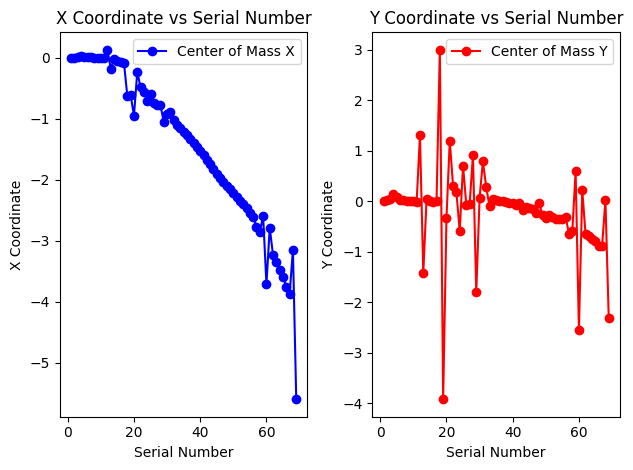

In [17]:
# Plot x and y vs. serial number
serial_numbers = np.arange(1,no_of_samples)
# Plot for x coordinates
plt.subplot(1, 2, 1)
plt.plot(serial_numbers, diff_x_array, marker='o', linestyle='-', color='b', label='Center of Mass X')
plt.xlabel('Serial Number')
plt.ylabel('X Coordinate')
plt.title('X Coordinate vs Serial Number')
plt.legend()

# Plot for y coordinates
plt.subplot(1, 2, 2)
plt.plot(serial_numbers, diff_y_array, marker='o', linestyle='-', color='r', label='Center of Mass Y')
plt.xlabel('Serial Number')
plt.ylabel('Y Coordinate')
plt.title('Y Coordinate vs Serial Number')
plt.legend()

plt.tight_layout()
plt.show()